In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

from corrGraph.corrGraph import CorrGraph


In [2]:


# Load the breast cancer dataset
data = load_breast_cancer()
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target

In [3]:
# Calculate the correlation matrix
correlation_matrix = df_cancer[data.feature_names].corr()

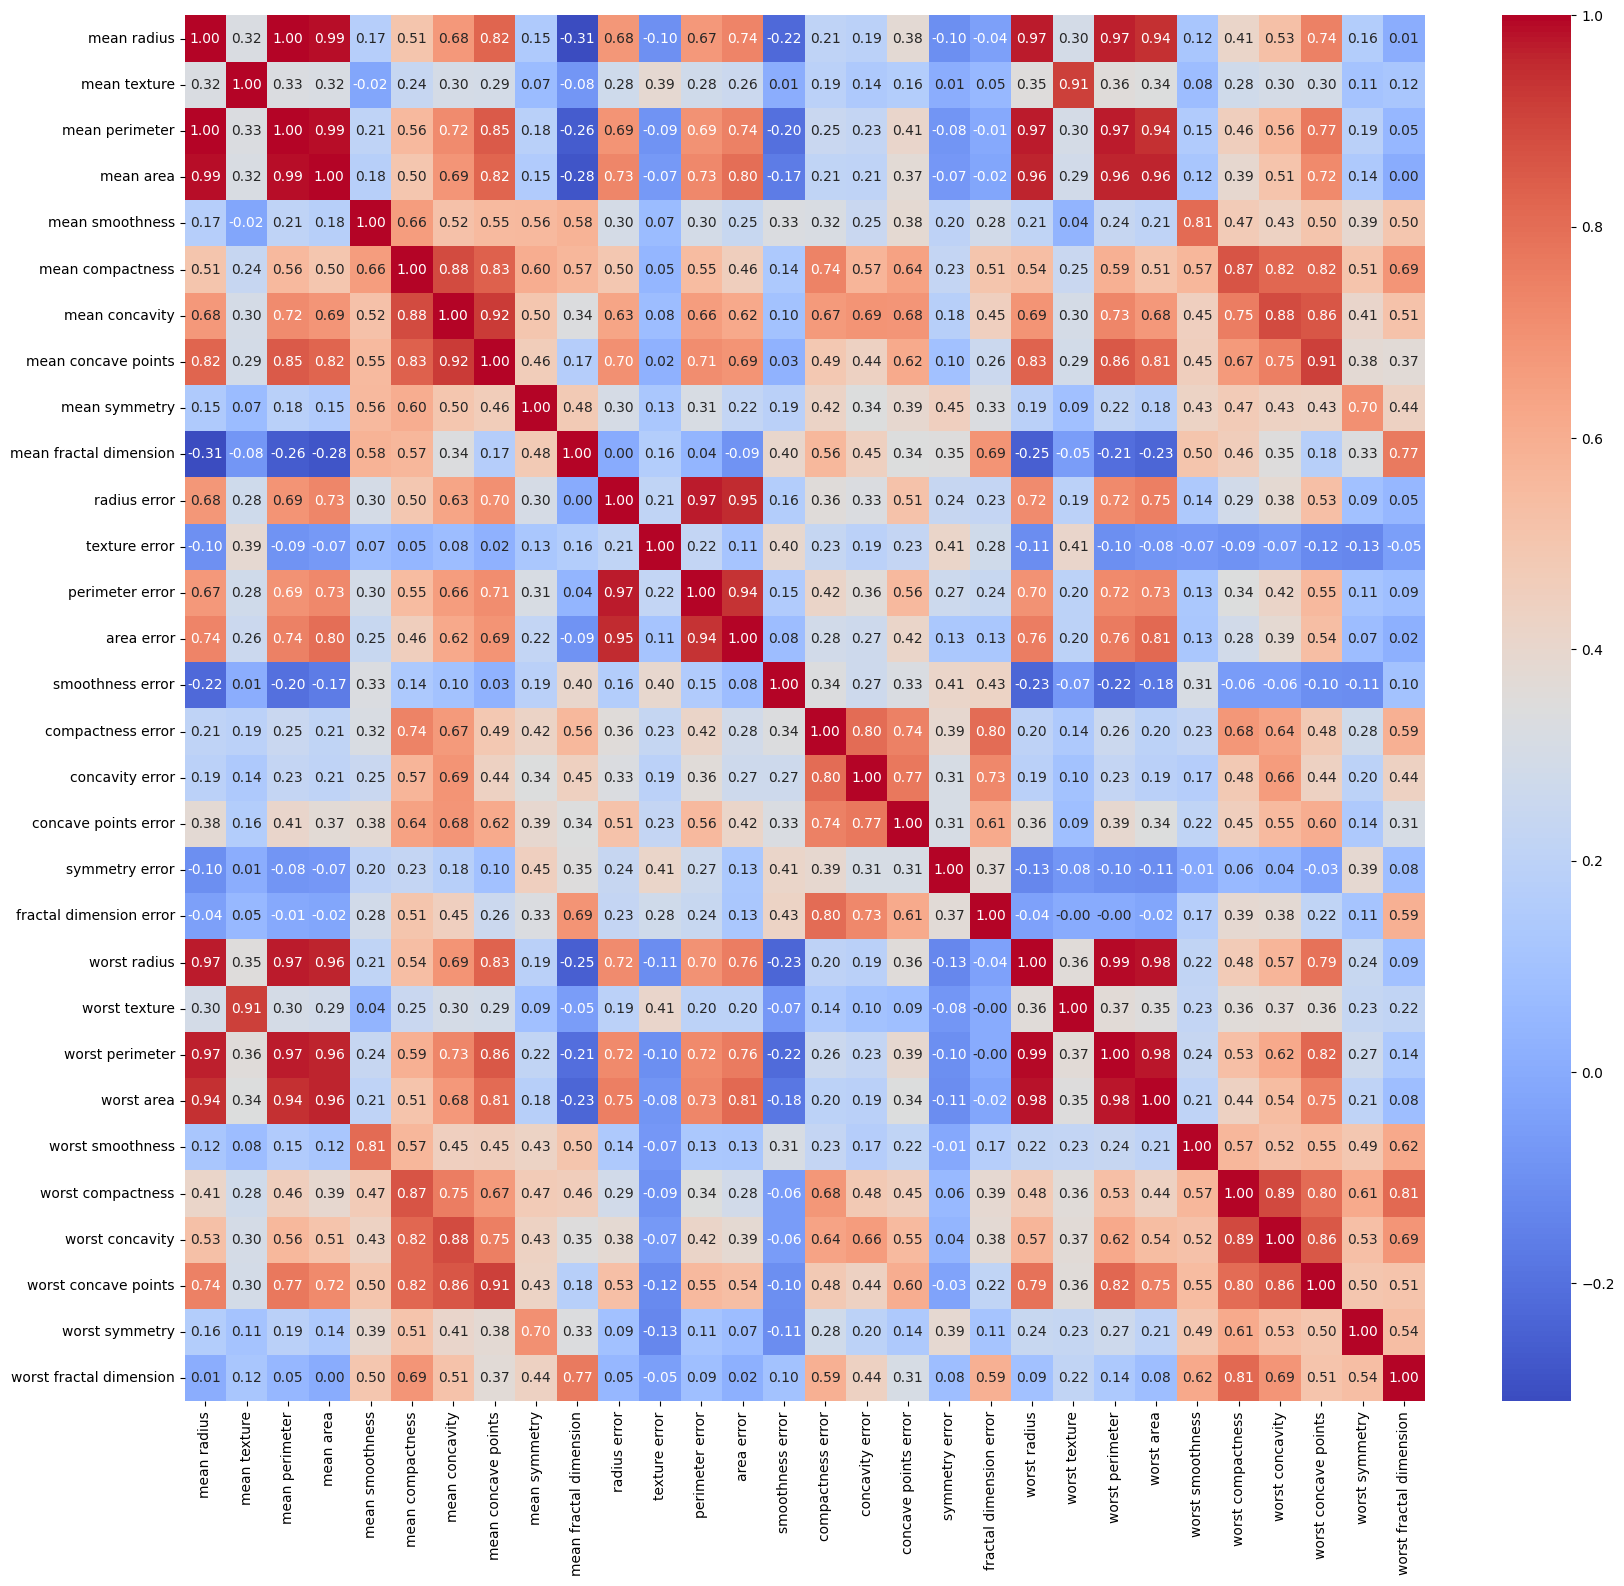

In [4]:
# Set the size of the plot
plt.figure(figsize=(20, 18))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

In [5]:
breast_cancer_correlation_graph = CorrGraph(correlation_matrix, threshold=0.6)

In [6]:
# Display all nodes in the breast_cancer_graph
nodes = breast_cancer_correlation_graph.get_graph().nodes()
print(nodes)

['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area', 'worst concave points', 'mean texture', 'worst texture', 'mean smoothness', 'mean compactness', 'worst smoothness', 'mean symmetry', 'compactness error', 'concave points error', 'worst compactness', 'worst concavity', 'worst fractal dimension', 'concavity error', 'worst symmetry', 'mean fractal dimension', 'fractal dimension error', 'texture error', 'smoothness error', 'symmetry error']


In [7]:
edges = breast_cancer_correlation_graph.get_graph().edges(data=True)
print(edges)

[('mean radius', 'mean perimeter', {'weight': np.float64(0.9978552814938106)}), ('mean radius', 'mean area', {'weight': np.float64(0.9873571700566129)}), ('mean radius', 'mean concavity', {'weight': np.float64(0.6767635503908105)}), ('mean radius', 'mean concave points', {'weight': np.float64(0.8225285223871784)}), ('mean radius', 'radius error', {'weight': np.float64(0.6790903880020744)}), ('mean radius', 'perimeter error', {'weight': np.float64(0.6741716157641049)}), ('mean radius', 'area error', {'weight': np.float64(0.7358636632128176)}), ('mean radius', 'worst radius', {'weight': np.float64(0.9695389726112049)}), ('mean radius', 'worst perimeter', {'weight': np.float64(0.9651365139559871)}), ('mean radius', 'worst area', {'weight': np.float64(0.9410824595860461)}), ('mean radius', 'worst concave points', {'weight': np.float64(0.7442141978674655)}), ('mean perimeter', 'mean area', {'weight': np.float64(0.9865068039913908)}), ('mean perimeter', 'mean concavity', {'weight': np.float6

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X = df_cancer.drop('target', axis=1)
y = df_cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.956140350877193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [9]:
# Display the model details
print("Logistic Regression Model Details:")
print(f"Classes: {log_reg.classes_}")
print(f"Number of iterations: {log_reg.n_iter_}")
print(f"Intercept: {log_reg.intercept_}")

# Create a DataFrame to display feature names and their corresponding coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})

print(coefficients)

Logistic Regression Model Details:
Classes: [0 1]
Number of iterations: [4129]
Intercept: [29.25015444]
                    Feature  Coefficient
0               mean radius     0.996486
1              mean texture     0.222369
2            mean perimeter    -0.364095
3                 mean area     0.025906
4           mean smoothness    -0.155688
5          mean compactness    -0.233986
6            mean concavity    -0.525442
7       mean concave points    -0.281737
8             mean symmetry    -0.222697
9    mean fractal dimension    -0.036226
10             radius error    -0.097012
11            texture error     1.368973
12          perimeter error    -0.170212
13               area error    -0.088097
14         smoothness error    -0.022412
15        compactness error     0.050076
16          concavity error    -0.037312
17     concave points error    -0.031734
18           symmetry error    -0.032673
19  fractal dimension error     0.012040
20             worst radius     0.0

In [10]:
coefficients.set_index('Feature', inplace=True)

In [11]:
coefficients.head()

,Coefficient
Feature,
mean radius,0.996486
mean texture,0.222369
mean perimeter,-0.364095
mean area,0.025906
mean smoothness,-0.155688


In [12]:
coefficients_dict = coefficients.to_dict(orient='dict')['Coefficient']

In [13]:
breast_cancer_correlation_graph.update_node_weights(coefficients_dict)

In [14]:
coefficients_dict

{'mean radius': 0.9964857830239529,
 'mean texture': 0.22236851319474615,
 'mean perimeter': -0.36409500845717496,
 'mean area': 0.025906146513248227,
 'mean smoothness': -0.1556879708460549,
 'mean compactness': -0.233985724784738,
 'mean concavity': -0.5254422631937481,
 'mean concave points': -0.2817369281988946,
 'mean symmetry': -0.22269666009531672,
 'mean fractal dimension': -0.0362258521528038,
 'radius error': -0.09701168868020194,
 'texture error': 1.3689725758233342,
 'perimeter error': -0.17021241045102647,
 'area error': -0.08809706596364268,
 'smoothness error': -0.02241154844062779,
 'compactness error': 0.05007591750468294,
 'concavity error': -0.03731166403384027,
 'concave points error': -0.03173435085991369,
 'symmetry error': -0.032673061256959283,
 'fractal dimension error': 0.012039915915234577,
 'worst radius': 0.08538736581094483,
 'worst texture': -0.5107271287236262,
 'worst perimeter': -0.015893783474788977,
 'worst area': -0.01656643202617177,
 'worst smooth

In [15]:
breast_cancer_correlation_graph.visualize_graph_with_pyvis(edge_weight_is_size=False)

correlation_graph.html
